In this notebook, I detail the method by which a grid is generated and subsequently filled.

In [1]:
import pickle
import numpy as np

WEEKDAY_GRID_SIZE = 15

In [2]:
#  if a square is empty, 0.  If a square is black, 1.
def bin_gridify(raw_grids):
    binary_grids = []
    for grid in raw_grids:
        new_grid = [1 if x == "." else 0 for x in grid ]
        binary_grids = binary_grids + [new_grid]
    return binary_grids


In [3]:
dow_dict = pickle.load(open('../bin/pickles/dow_dict.pickle','rb'))

In [4]:
data_set = []
for day in dow_dict.keys():
    grid_list = dow_dict[day]
    grid_list = bin_gridify(grid_list)
    data_set = data_set + [grid_list]

In [5]:
import matplotlib.pyplot as plt

mon = data_set[0]
mon = [np.array(grid).reshape(15,15) for grid in mon if len(grid) == (15*15)]


In [6]:
# defining a function that checks the symmetry of the
def check_symmetry(dim,grid):
    leng = dim*dim
    half = (leng-1)//2
    array = grid.reshape(leng,)
    front = array[:half]
    back = array[-half:]
    return (front == np.flip(back)).all()

In [7]:
check_symmetry(15,mon[0])

True

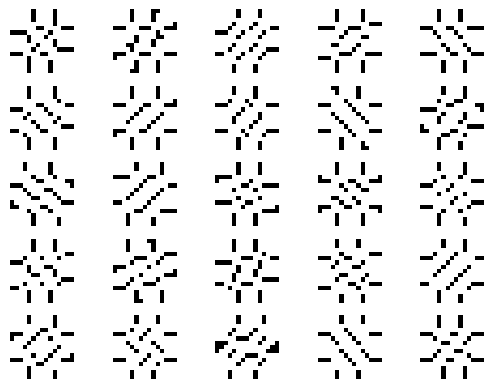

In [8]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(mon[i],cmap="Greys")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# creating a gan, we start by defining a standalone discriminator
from keras import Sequential
from keras.layers import LeakyReLU, Conv2D, Dropout, Flatten, Dense
from keras.optimizers import Adam


def define_discriminator(in_shape=(15,15,1)):
    model = Sequential()

    model.add(Conv2D(64, (3,3), strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0,4))

    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))


    opt = Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

model = define_discriminator()
model.summary()

2022-09-06 00:38:24.576769: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 64)          640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

2022-09-06 00:38:25.323848: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-06 00:38:25.324357: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-06 00:38:25.352011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 00:38:25.352101: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-09-06 00:38:25.352120: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-09-06 00:38:25.353101: I tensorflow/stream_executor/platform/de

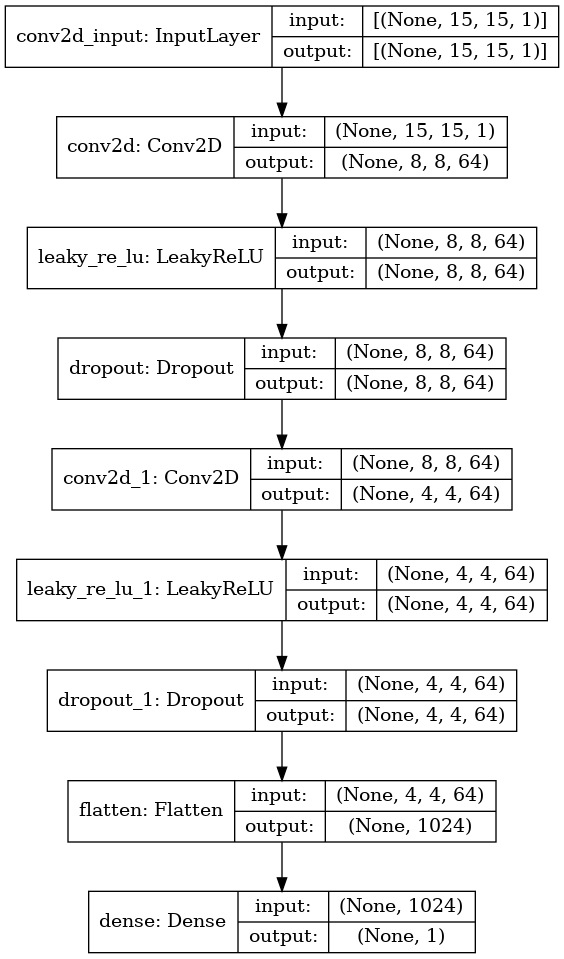

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model,to_file='discriminator.png', show_shapes=True, show_layer_names=True)